# Explore here

Step 1: Loading the dataset
The dataset can be found in this project folder under the name sales.csv. You can load it into the code directly from the link (https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv) or download it and add it by hand in your repository.

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

total_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


<b>Step 2: Construct and analyze the time serie</b>

Construct the valid data structure for the time serie, graph it, and then analyze it and answer the following questions:


Which is the tensor of the time serie?<br>
Which is the trend?<br>
Is it stationary?<br>
Is there variability or noise?<br>

Which is the tensor of the time serie?<br>
Which is the trend?<br>
Is it stationary?<br>
- The average of sales keeps going up steadily therefore not stationary. 
Is there variability or noise?<br>

In [8]:
total_data['date'] = pd.to_datetime(total_data['date'])
#converts the 'date' column in the DataFrame total_data to datetime format.


total_data.set_index('date', inplace=True)
#sets the 'date' column as the index of the DataFrame total_data. It uses the set_index() method from pandas DataFrame to set the index. After this operation, the DataFrame will have the 'date' column as its index instead of the default numerical index.

In [2]:
ts_total = total_data["sales"]
# extracts the column named 'sales' from the DataFrame total_data and assigns it to a new variable ts_total. It selects the 'sales' column using dictionary-like syntax (total_data["sales"]) and assigns it to the variable ts_total. This creates a pandas Series object containing the 'sales' data, with the 'date' column as the index.

ts_total.head()

0    55.292157
1    53.803211
2    58.141693
3    64.530899
4    66.013633
Name: sales, dtype: float64

In [4]:
total_data

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


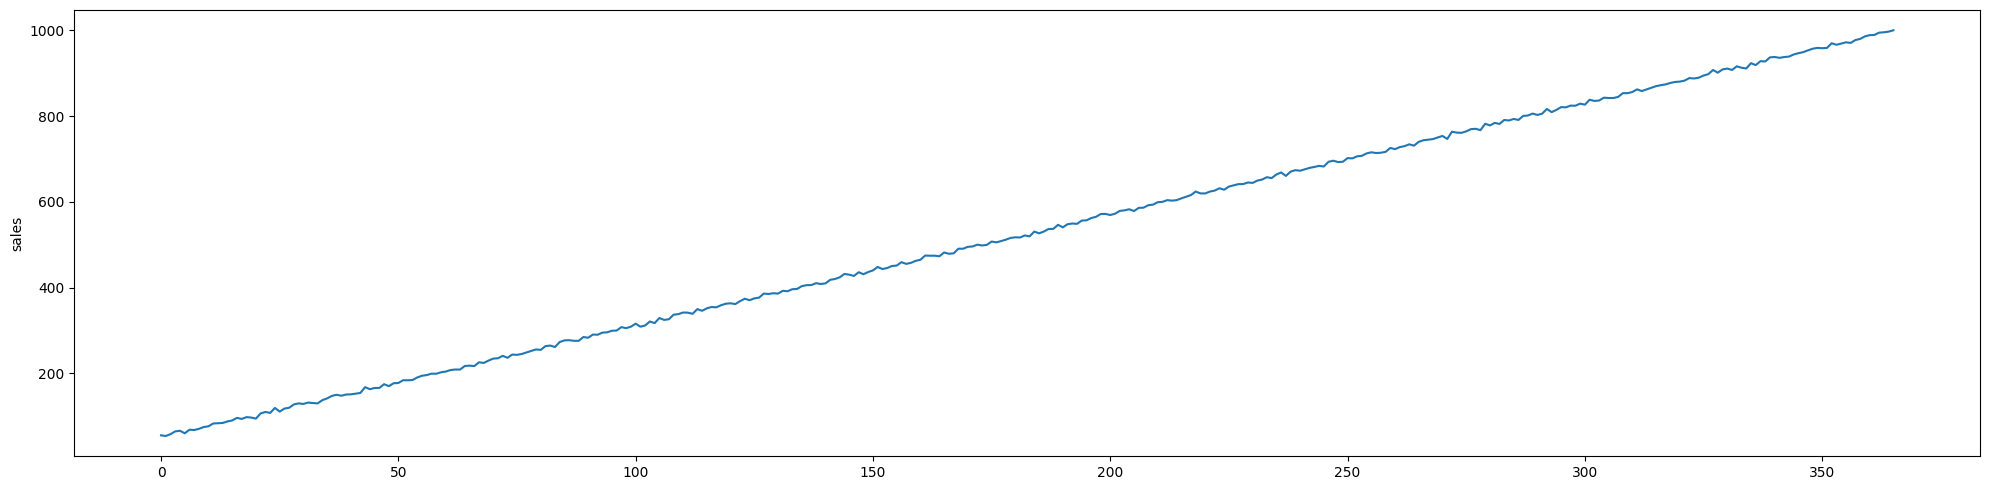

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (20,5))

sns.lineplot(data = ts_total)

plt.tight_layout()

plt.show()

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller

decomposition = seasonal_decompose(ts_total, period=12)
decomposition

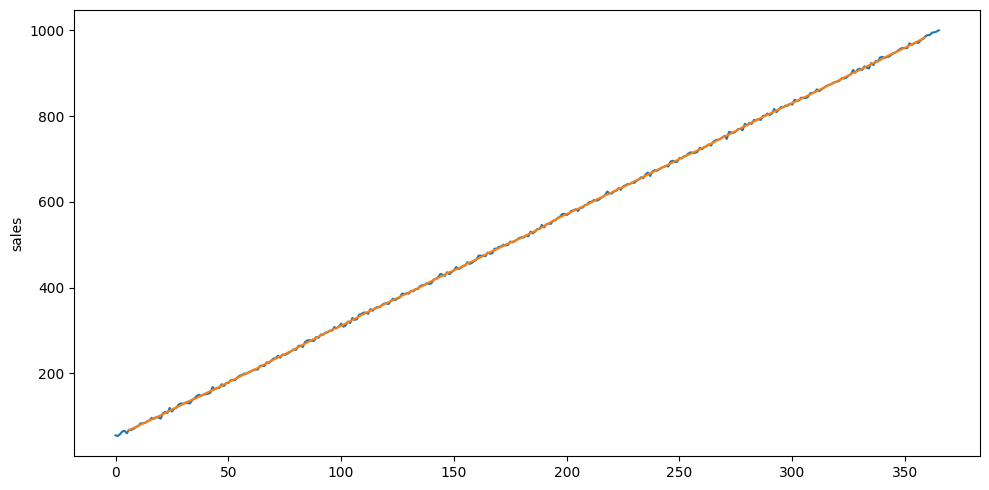

In [20]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

In [41]:
ts_total


0        55.292157
1        53.803211
2        58.141693
3        64.530899
4        66.013633
          ...     
361     989.600354
362     994.987326
363     995.814415
364     997.350214
365    1000.482785
Name: sales, Length: 366, dtype: float64

In [42]:
trend

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
361   NaN
362   NaN
363   NaN
364   NaN
365   NaN
Name: trend, Length: 366, dtype: float64

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.776
Date:                Tue, 09 Apr 2024   AIC                           1839.552
Time:                        00:22:42   BIC                           1855.152
Sample:                             0   HQIC                          1845.752
                                - 366                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

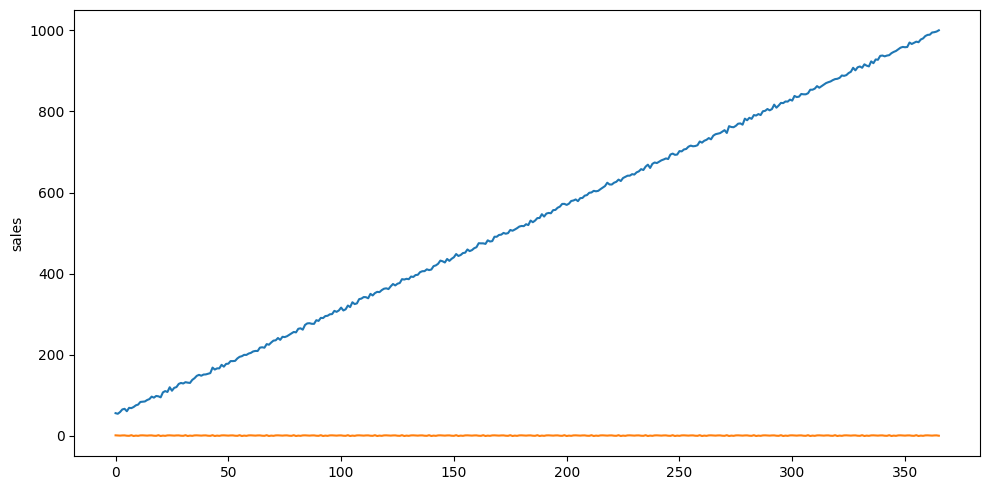

In [21]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_total)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

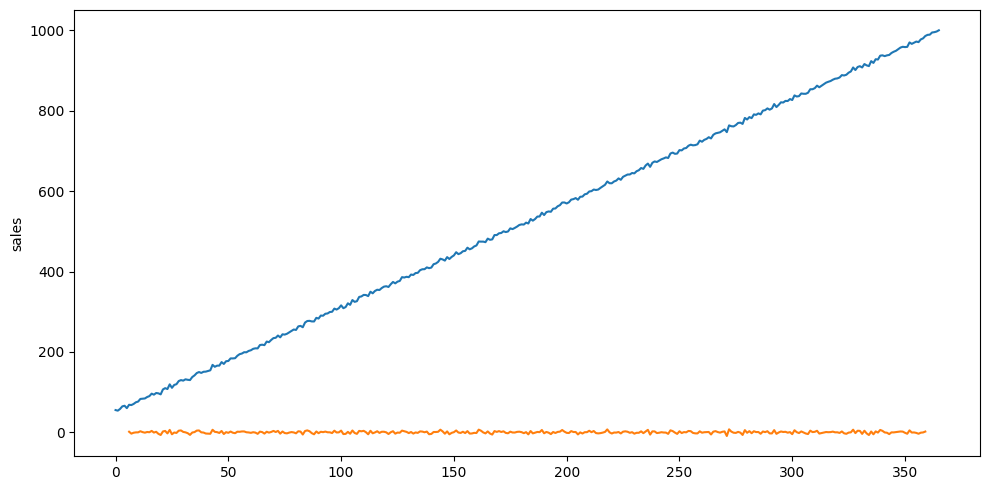

In [23]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

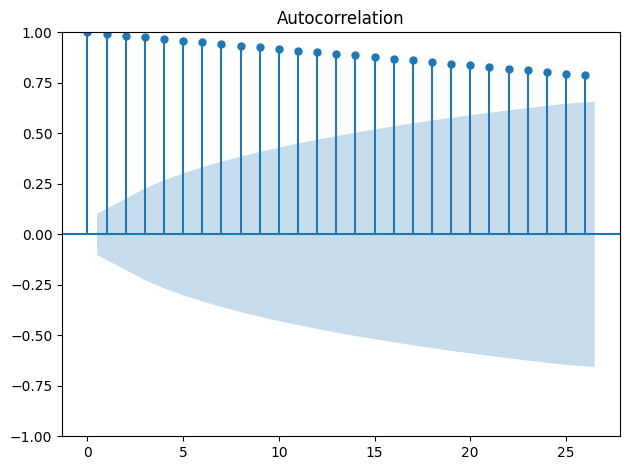

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts_total)

plt.tight_layout()

plt.show()

In [25]:
null_counts = total_data.isna().sum()  # or df.isnull().sum()

# Print null counts
print("Null counts per column:")
print(null_counts)

Null counts per column:
date     0
sales    0
dtype: int64


In [27]:
ts_stationary = ts_total.diff().dropna()

test_stationarity(ts_stationary)


Dickey-Fuller test results:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

<b>Step 3: Train an ARIMA</b><br>
Use the training data to find the best parameterization of your ARIMA model.

In [31]:
from pmdarima import auto_arima

model = auto_arima(ts_total, seasonal = False, trace = True, m = 7)
# trace -When trace is set to True, the fitting process will print detailed debugging information to the console, providing insights into the inner workings of the ARIMA fitting process.
# m parameter represents the seasonal periodicity of the data


/home/vscode/.local/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.056 seconds


In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.776
Date:                Tue, 09 Apr 2024   AIC                           1839.552
Time:                        00:23:00   BIC                           1855.152
Sample:                             0   HQIC                          1845.752
                                - 366                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<b>Step 4: Predict with the test set</b><br>
Now use the trained model with the test set and compare the points with the real ones. Measure the performance of the time serie.

In [47]:
forecast = model.predict(100)
forecast

366    1002.158148
367    1004.831669
368    1007.423289
369    1010.021630
370    1012.619419
          ...     
461    1249.022047
462    1251.619878
463    1254.217709
464    1256.815540
465    1259.413371
Length: 100, dtype: float64

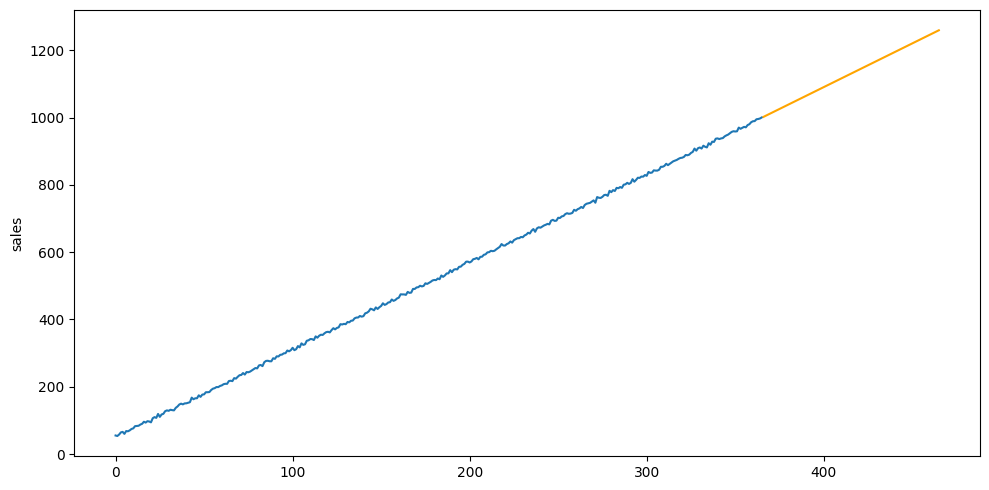

In [48]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = forecast, c = "orange")

plt.tight_layout()

plt.show()

<b>Step 5: Save the model</br><br>
Store the model in the corresponding folder.

In [37]:
import pickle

# Save the model using pickle
with open('../models/arima_model.pkl', 'wb') as f:
    pickle.dump(model, f)